In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
import re

import nltk
from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize
from nltk.corpus import stopwords
import spacy

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('../data/intern_700.xlsx', encoding='utf-8') 
#df.head(1)

In [183]:
df[df.columns[6]].astype(str)[1]

'\xa0In regards to my talents, I have a strong background in project management and general communications. I am able to manage and evaluate vast amounts of data to find key traits that would create opportunities for a more efficient project. Collaboration and cooperation also come naturally to me as well since I work well with people, making important communication between companies a simple task. I am work oriented and enjoy challenging myself to solve problems as well as to accelerate my success. Pushing outside of my own comfort zone is something I like to do regularly and I have an open mind to learning whatever I can.\xa0'

In [ ]:
#key_lst =['data analysis','machine learning','data mining', 'deep learning','AI','artificial intelligence']

In [ ]:
'''dict1 = {}
#dfq1 = df[df.columns[6]].astype(str)
for idx, val in df[df.columns[6]].astype(str).items():
    val = val.lower()
    for i in key_lst:
        if i in val:
            dict1[idx] = val.replace('\xa0', ' ')

dict2 = {}
#dfq2 = df[df.columns[7]].astype(str)
for idx, val in df[df.columns[7]].astype(str).items():
    if idx in [i for i in dict1.keys()]:
        dict2[idx] = val.replace('\xa0', ' ')
        
list1, list2 = [],[]
for idx, val in dict1.items():
    list1.append(val)
for idx, val in dict2.items():
    list2.append(val)'''

In [ ]:
#query = df[df.columns[7]]
# remove short words (length < 3)

In [184]:
dict_doc = {}
for idx, val in df[df.columns[6]].astype(str).items():
    val = val.lower()
    dict_doc[idx] = val.replace('\xa0', ' ')
lst_doc = []
for inx, val in dict_doc.items():
    lst_doc.append(val)

In [185]:
len(lst_doc)

677

In [186]:
'''from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

client = language.LanguageServiceClient()
document = language.types.Document(content = total_tokens[:10],
                                   type=enums.Document.Type.PLAIN_TEXT
                                  )

tokens = client.analyze_syntax(document).tokens

# part-of-speech tags from list(enums.PartOfSpeech.Tag)
pos_tag = ('UNKNOWN', 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM',
           'PRON', 'PRT', 'PUNCT', 'VERB', 'X', 'AFFIX')


dict = {}
for token in tokens:
    dict[token.text.content] = pos_tag[token.part_of_speech.tag]
dict'''

"from google.cloud import language\nfrom google.cloud.language import enums\nfrom google.cloud.language import types\n\nclient = language.LanguageServiceClient()\ndocument = language.types.Document(content = total_tokens[:10],\n                                   type=enums.Document.Type.PLAIN_TEXT\n                                  )\n\ntokens = client.analyze_syntax(document).tokens\n\n# part-of-speech tags from list(enums.PartOfSpeech.Tag)\npos_tag = ('UNKNOWN', 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM',\n           'PRON', 'PRT', 'PUNCT', 'VERB', 'X', 'AFFIX')\n\n\ndict = {}\nfor token in tokens:\n    dict[token.text.content] = pos_tag[token.part_of_speech.tag]\ndict"

## clean the text

In [187]:
def clean_doc(text):
    #porter = nltk.PorterStemmer()
    lemmatizer = nltk.WordNetLemmatizer()
    tokens = text.lower() # case-folding (of the whole text string)
    tokens = word_tokenize(tokens) # default tokenizer
    tokens = [w for w in tokens if w not in stopwords.words('english')] # filter English stopwords
    tokens = [w for w in tokens if len(w) > 2]
    #tokens = [porter.stem(tok) for tok in tokens] # apply stemmer
    tokens = [lemmatizer.lemmatize(tok) for tok in tokens]
    tokens = [w for w in tokens if w.isalpha()] # filter tokens that contain non-alphabetic character(s)
    return tokens

def create_token(lst):
    token = [None] * len(lst)
    for i in range(len(lst)):
        token[i] = clean_doc(lst[i])
    return token

def create_wordcloud(total_tok):
    wordcloud = WordCloud().generate(' '.join(total_tok))
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [188]:
token_doc = create_token(lst_doc)
total_tokens = [t for doc_t in token_doc for t in doc_t]

In [190]:
print(token_doc[0])

['technical', 'skill', 'would', 'say', 'good', 'prioritizing', 'work', 'project', 'discussion', 'many', 'agenda', 'breaking', 'facilitating', 'prioritizing', 'discussion', 'helped', 'stand', 'among', 'group', 'time', 'working', 'data', 'warehousing', 'project', 'documentation', 'something', 'apart', 'work', 'helped', 'many', 'time', 'since', 'entity', 'report', 'constant', 'change', 'impact', 'decided', 'document', 'everything', 'helpful', 'fellow', 'team', 'mate', 'approach', 'asking', 'many', 'question', 'month', 'year', 'project', 'transition', 'time', 'made', 'document', 'everyone', 'refer', 'future']


In [191]:
#create_wordcloud(total_tokens)

In [192]:
'''def create_freq_graph (freq_dict):
    words_df = pd.DataFrame({'word':list(freq_dict.keys()), 'count':list(freq_dict.values())})
    d = words_df.nlargest(columns="count", n = 15) 
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data=d, x= "count", y = "word")
    ax.set(ylabel = 'Count')
    plt.show()'''

'def create_freq_graph (freq_dict):\n    words_df = pd.DataFrame({\'word\':list(freq_dict.keys()), \'count\':list(freq_dict.values())})\n    d = words_df.nlargest(columns="count", n = 15) \n    plt.figure(figsize=(12,8))\n    ax = sns.barplot(data=d, x= "count", y = "word")\n    ax.set(ylabel = \'Count\')\n    plt.show()'

In [193]:
'''fdist = nltk.FreqDist(total_tokens)
top_500 = fdist.most_common(500)
token_bi = list(nltk.bigrams(total_tokens))
token_bi_fd = nltk.FreqDist(token_bi)'''

'fdist = nltk.FreqDist(total_tokens)\ntop_500 = fdist.most_common(500)\ntoken_bi = list(nltk.bigrams(total_tokens))\ntoken_bi_fd = nltk.FreqDist(token_bi)'

In [194]:
#create_freq_graph(fdist)

## pos_tag using GCP API

In [195]:
# set up env locally
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r'C:\Users\RayHu\Google Drive\FORKaiA\ruiyu-gcp-4ac10836d3b1.json' 

from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

In [ ]:
'''
pos_dict = {}
# part-of-speech tags from list(enums.PartOfSpeech.Tag)
pos_tag = ('UNKNOWN', 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM',
           'PRON', 'PRT', 'PUNCT', 'VERB', 'X', 'AFFIX')


client = language.LanguageServiceClient()

for _ in total_tokens[:10]:
    _.join('')
    document = language.types.Document(content =_ ,
                                   type=enums.Document.Type.PLAIN_TEXT)
    tokens = client.analyze_syntax(document).tokens
    
    for token in tokens:
        dict[token.text.content] = pos_tag[token.part_of_speech.tag]'''

In [ ]:
'''def filter_pos_tags(a_tok_lst):
    client = language.LanguageServiceClient()
    # part-of-speech tags from list(enums.PartOfSpeech.Tag)
    pos_tag = ('UNKNOWN', 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM',
               'PRON', 'PRT', 'PUNCT', 'VERB', 'X', 'AFFIX')
    tags = ['NOUN','ADJ']
    clean = []
    for _ in a_tok_lst:
        output =[]
        doc = ' '.join(_)
        document = language.types.Document(content = doc, type=enums.Document.Type.PLAIN_TEXT)
        tokens = client.analyze_syntax(document).tokens
        
        for token in tokens:
            if pos_tag[token.part_of_speech.tag] in tags:
                output.append(token.text.content)
        clean.append([k for k in output])    
    return clean'''

In [197]:
#token_doc_v2 = filter_pos_tags(token_doc)

In [218]:
client = language.LanguageServiceClient()
# part-of-speech tags from list(enums.PartOfSpeech.Tag)
pos_tag = ('UNKNOWN', 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM',
           'PRON', 'PRT', 'PUNCT', 'VERB', 'X', 'AFFIX')
tags = ['NOUN','ADJ']

In [217]:
output = []

In [219]:
#clean =[]
for _ in token_doc[300:]:
    output =[]
    doc = ' '.join(_)
    document = language.types.Document(content = doc, type=enums.Document.Type.PLAIN_TEXT)
    tokens = client.analyze_syntax(document).tokens
    for token in tokens:
        if pos_tag[token.part_of_speech.tag] in tags:
            output.append(token.text.content)
    clean.append([k for k in output])   

In [225]:
print(clean[0])

['technical', 'skill', 'good', 'prioritizing', 'work', 'project', 'discussion', 'many', 'agenda', 'prioritizing', 'discussion', 'group', 'time', 'data', 'warehousing', 'project', 'documentation', 'something', 'work', 'many', 'time', 'entity', 'constant', 'change', 'impact', 'document', 'everything', 'helpful', 'fellow', 'team', 'mate', 'approach', 'many', 'question', 'month', 'year', 'project', 'transition', 'time', 'document', 'everyone', 'future']


In [224]:
print(token_doc[0])

['technical', 'skill', 'would', 'say', 'good', 'prioritizing', 'work', 'project', 'discussion', 'many', 'agenda', 'breaking', 'facilitating', 'prioritizing', 'discussion', 'helped', 'stand', 'among', 'group', 'time', 'working', 'data', 'warehousing', 'project', 'documentation', 'something', 'apart', 'work', 'helped', 'many', 'time', 'since', 'entity', 'report', 'constant', 'change', 'impact', 'decided', 'document', 'everything', 'helpful', 'fellow', 'team', 'mate', 'approach', 'asking', 'many', 'question', 'month', 'year', 'project', 'transition', 'time', 'made', 'document', 'everyone', 'refer', 'future']


In [ ]:
print(clean[0])

# topic modeling

In [159]:
import spacy

import gensim
from gensim import corpora
from gensim.models import CoherenceModel


# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

C:\Users\RayHu\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [226]:
token_doc = clean

**create dict and corpus for topic modeling**

In [227]:
dictionary = corpora.Dictionary(token_doc)
corpus = [dictionary.doc2bow(tok) for tok in token_doc]

In [228]:
# review corpus (term-frequency)
#[[(dictionary1[id], freq) for id, freq in cp] for cp in corpus[:1]]

**building the model**

In [229]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=corpus, id2word=dictionary, num_topics=4)
                #random_state=100,chunksize=10, passes=2)

**view the model**

In [230]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.028*"data" + 0.017*"problem" + 0.016*"skill" + 0.013*"analysis" + '
  '0.013*"project" + 0.011*"work" + 0.010*"new" + 0.010*"team" + '
  '0.009*"ability" + 0.008*"business"'),
 (1,
  '0.025*"experience" + 0.021*"data" + 0.016*"skill" + 0.012*"project" + '
  '0.011*"learning" + 0.009*"analysis" + 0.008*"machine" + 0.008*"python" + '
  '0.008*"new" + 0.006*"development"'),
 (2,
  '0.021*"skill" + 0.014*"work" + 0.013*"analysis" + 0.011*"data" + '
  '0.010*"problem" + 0.009*"able" + 0.008*"programming" + 0.007*"people" + '
  '0.007*"new" + 0.007*"experience"'),
 (3,
  '0.020*"skill" + 0.019*"data" + 0.019*"good" + 0.017*"problem" + '
  '0.015*"project" + 0.009*"work" + 0.009*"new" + 0.008*"computer" + '
  '0.008*"experience" + 0.008*"knowledge"')]


**compute perplexity and coherence score**

In [231]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=token_doc, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.142526985074269

Coherence Score:  0.3999559327422195


**viz the topics keywords**

Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.

A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

In [ ]:
'''pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary1)
vis'''

In [167]:
'''import os
cwd = os.getcwd()
cwd'''

'import os\ncwd = os.getcwd()\ncwd'

**Building LDA Mallet Model**

In [168]:
'''#https://github.com/RaRe-Technologies/gensim/issues/2163
import os
os.environ.update({'MALLET_HOME':r'C:/Users/RayHu/Google Drive/FORKaiA/intern/notebook/mallet-2.0.8/'})
mallet_path = r'C:\Users\RayHu\Google Drive\FORKaiA\intern\notebook\mallet-2.0.8\bin\mallet' # update this path

# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=4, id2word=dictionary1)'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 189-190: truncated \UXXXXXXXX escape (<ipython-input-168-e4335d742cb7>, line 8)

In [232]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)#random_state=100,chunksize=10, passes=2)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

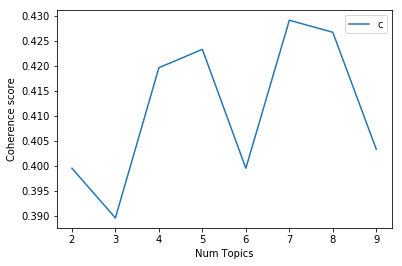

Num Topics = 2  has Coherence Value of 0.3996
Num Topics = 3  has Coherence Value of 0.3896
Num Topics = 4  has Coherence Value of 0.4197
Num Topics = 5  has Coherence Value of 0.4233
Num Topics = 6  has Coherence Value of 0.3996
Num Topics = 7  has Coherence Value of 0.4292
Num Topics = 8  has Coherence Value of 0.4268
Num Topics = 9  has Coherence Value of 0.4033


In [233]:
# Q1,
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus,texts=token_doc, start=2, limit=10, step=1)

# Show graph
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

**select optimized model**

In [234]:
optimal_model = model_list[5]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=6))

[(0,
  '0.015*"work" + 0.014*"thing" + 0.013*"new" + 0.013*"problem" + '
  '0.012*"skill" + 0.012*"able"'),
 (1,
  '0.042*"data" + 0.021*"project" + 0.014*"analysis" + 0.013*"experience" + '
  '0.012*"skill" + 0.012*"work"'),
 (2,
  '0.024*"problem" + 0.023*"analysis" + 0.014*"data" + 0.012*"skill" + '
  '0.010*"experience" + 0.008*"learning"'),
 (3,
  '0.024*"good" + 0.015*"project" + 0.013*"data" + 0.013*"work" + '
  '0.012*"people" + 0.012*"skill"'),
 (4,
  '0.017*"new" + 0.015*"skill" + 0.014*"data" + 0.014*"experience" + '
  '0.011*"project" + 0.010*"problem"'),
 (5,
  '0.035*"skill" + 0.031*"data" + 0.015*"analysis" + 0.011*"problem" + '
  '0.010*"experience" + 0.010*"business"'),
 (6,
  '0.024*"data" + 0.019*"problem" + 0.013*"skill" + 0.011*"experience" + '
  '0.008*"work" + 0.008*"ability"')]


**finding the dominant topic in each sentence**

In [235]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [236]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=lst_doc)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.9800,"data, project, analysis, experience, skill, wo...","more than technical skills, i would say am goo..."
1,1,6.0,0.5709,"data, problem, skill, experience, work, abilit...","in regards to my talents, i have a strong bac..."
2,2,5.0,0.9755,"skill, data, analysis, problem, experience, bu...",i have exceptional time management skills. as ...
3,3,3.0,0.8568,"good, project, data, work, people, skill, expe...",i am goo with back-end development and machine...
4,4,4.0,0.9740,"new, skill, data, experience, project, problem...",i'm talented at self-control. i would finish m...
5,5,4.0,0.9570,"new, skill, data, experience, project, problem...",i believe my biggest talent is being flexible...
6,6,4.0,0.9780,"new, skill, data, experience, project, problem...",my name is aprillia and i've always been a cri...
7,7,0.0,0.9669,"work, thing, new, problem, skill, able, projec...",1. i think i am talented at learning new thing...
8,8,0.0,0.9283,"work, thing, new, problem, skill, able, projec...",i would say that my competitive advantage invo...
9,9,2.0,0.9713,"problem, analysis, data, skill, experience, le...",i consider myself an analyst whether it be a ...


**Find the most representative document for each topic**

In [237]:
def sent_topics_sorteddf(df_keyword):
    sent_topics_sorteddf_mallet = pd.DataFrame()
    sent_topics_outdf_grpd = df_keyword.groupby('Dominant_Topic')

    for i, grp in sent_topics_outdf_grpd:
        sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

    # Reset Index    
    sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

    # Format
    sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

    # Show
    return sent_topics_sorteddf_mallet

In [238]:
df_q_topic = sent_topics_sorteddf(df_topic_sents_keywords)
df_q_topic

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9940,"work, thing, new, problem, skill, able, projec...","i am talented at working in groups, communicat..."
1,1.0,0.9934,"data, project, analysis, experience, skill, wo...",i believe that my one of my main talents is ar...
2,2.0,0.9908,"problem, analysis, data, skill, experience, le...",i'm a quick learner and always eager to learn ...
3,3.0,0.9945,"good, project, data, work, people, skill, expe...",i am a self-starter and i love to learn! to gi...
4,4.0,0.9907,"new, skill, data, experience, project, problem...",as a current freshman studying at the universi...
5,5.0,0.9943,"skill, data, analysis, problem, experience, bu...",i am a passionate programmer with extensive ba...
6,6.0,0.9907,"data, problem, skill, experience, work, abilit...",i believe my main talent is my use of soft ski...


In [240]:
for i in df_q_topic.Keywords:
    print(i)

work, thing, new, problem, skill, able, project, good, experience, computer
data, project, analysis, experience, skill, work, problem, team, learning, good
problem, analysis, data, skill, experience, learning, good, advantage, team, project
good, project, data, work, people, skill, experience, problem, machine, python
new, skill, data, experience, project, problem, analysis, thing, competitive, advantage
skill, data, analysis, problem, experience, business, project, ability, new, programming
data, problem, skill, experience, work, ability, programming, project, research, analysis


In [241]:
df_q_topic.Text.tolist()

['i am talented at working in groups, communicating, learning new tasks and operation quickly, and being adaptable when need be. the skills that truly define me as an individual however that gives me a competitive advantage over others is my ability to communicate well and adapt under new circumstances. communication is the backbone of any company. one needs to be able to talk to effectively and efficiently to get their meaning across while also making sure to receive information as well. my ability to adapt is also important as projects or an assignment might change, and the need to adapt to that change smoothly is vital in order to stay on task and get it done in a timely manner.',
 'i believe that my one of my main talents is articulating my thoughts well enough to present my analyses objectively and i believe that i can leverage this skill in a data-driven work environment. i can easily adapt to different communication styles, while interacting with management, customers or my peer